# Analyzing a real world data-set with SQL and Python

## Objectives
-   Understand a dataset of selected socioeconomic indicators in Chicago
-   Learn how to store data in an Db2 database on IBM Cloud instance
-   Practice SQL skills


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), but to summarize, the dataset has the following variables:

-   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

-   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

-   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

-   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

-   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

-   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

-   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

-   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

-   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

We'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [1]:
#!pip install ipython-sql
#!pip install ibm_db
#!pip install ibm_db_sa
#!pip install sqlalchemy
import ibm_db

In [2]:
%load_ext sql

In [3]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://**********:sf9%2B4x997051l2g1@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table


In [4]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "END-OF-STATEMENT" was found following "o_socioeconomic_data".  Expected tokens may include:  "JOIN <joined_table>".  SQLSTATE=42601\r SQLCODE=-104')
[SQL: PERSIST chicago_socioeconomic_data]
(Background on this error at: http://sqlalche.me/e/13/f405)


##### You can verify that the table creation was successful by making a basic query like:


In [5]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


##### How many rows are in the dataset?

In [6]:
chicago_socioeconomic_data.info()

#or

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ca                                           77 non-null     float64
 1   community_area_name                          78 non-null     object 
 2   percent_of_housing_crowded                   78 non-null     float64
 3   percent_households_below_poverty             78 non-null     float64
 4   percent_aged_16_unemployed                   78 non-null     float64
 5   percent_aged_25_without_high_school_diploma  78 non-null     float64
 6   percent_aged_under_18_or_over_64             78 non-null     float64
 7   per_capita_income_                           78 non-null     int64  
 8   hardship_index                               77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB
 * ibm_db_sa://tkj5481

1
78


###### How many community areas in Chicago have a hardship index greater than 50.0?


In [7]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [8]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
98.0


##### Which community area which has the highest hardship index?


In [9]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


Double-click **here** for the solution.

<!-- Hint:

## We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

## or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

## or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

Correct answer: 'Riverdale'
-->


##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [10]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


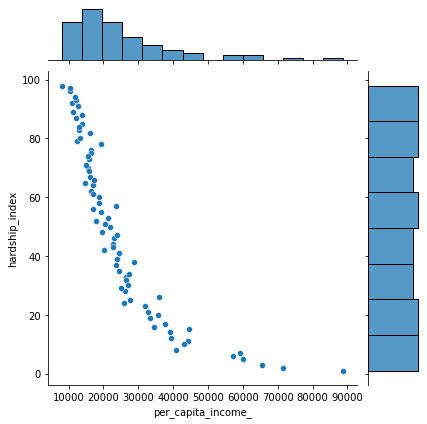

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

#### Further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


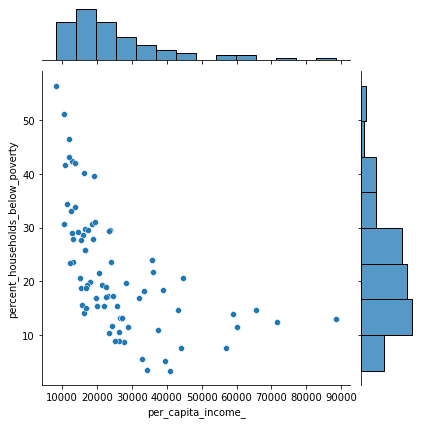

In [12]:
income_vs_hardship = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_hardship.DataFrame())

 * ibm_db_sa://tkj54814:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


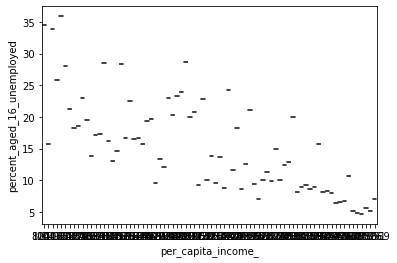

In [13]:
income_vs_hardship = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.boxplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_hardship.DataFrame())